### Перед началом работы необходимо установить библиотеку scikit-learn. Это можно сделать с помощью pip:

In [2]:
%pip install pandas matplotlib seaborn numpy scikit-learn

### Импорт необходимых библеотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

 ### Загрузка набора данных с ирисами, формирование DataFrame из данных и добавление целевого столбца

In [6]:
from sklearn.datasets import load_iris
data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

### Просмотр базовой информации о данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB



### Построение распределений для каждого признака


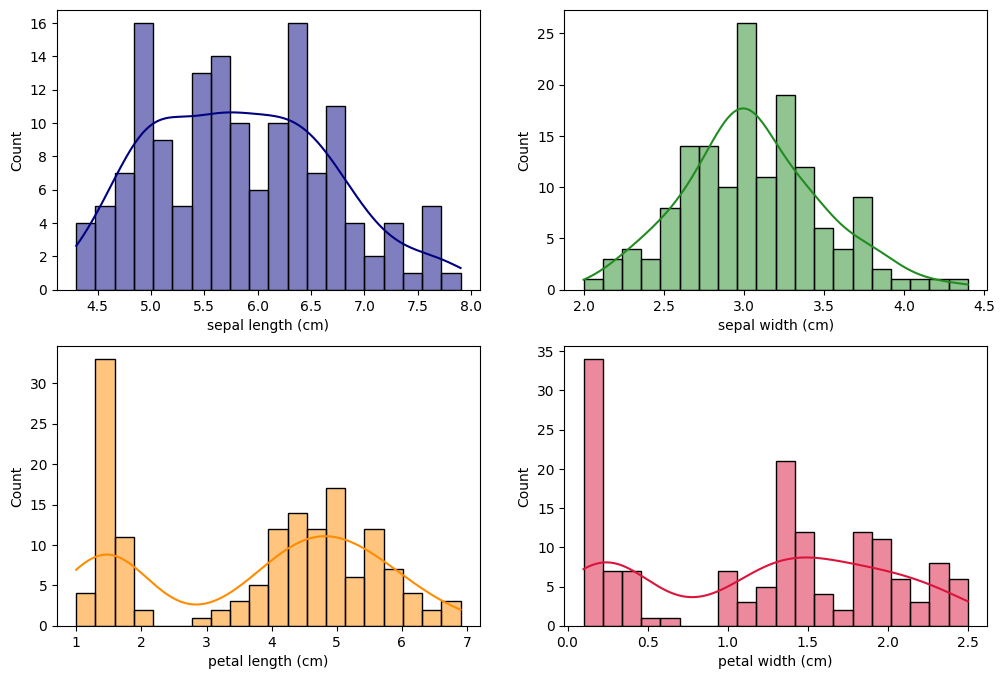

In [20]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['sepal length (cm)'], kde=True, bins=20, color='navy')

plt.subplot(2, 2, 2)
sns.histplot(df['sepal width (cm)'], kde=True, bins=20, color='forestgreen')

plt.subplot(2, 2, 3)
sns.histplot(df['petal length (cm)'], kde=True, bins=20, color='darkorange')

plt.subplot(2, 2, 4)
sns.histplot(df['petal width (cm)'], kde=True, bins=20, color='crimson')


plt.show()

### Построение диаграмм рассеяния для изучения взаимосвязей

<function matplotlib.pyplot.show(close=None, block=None)>

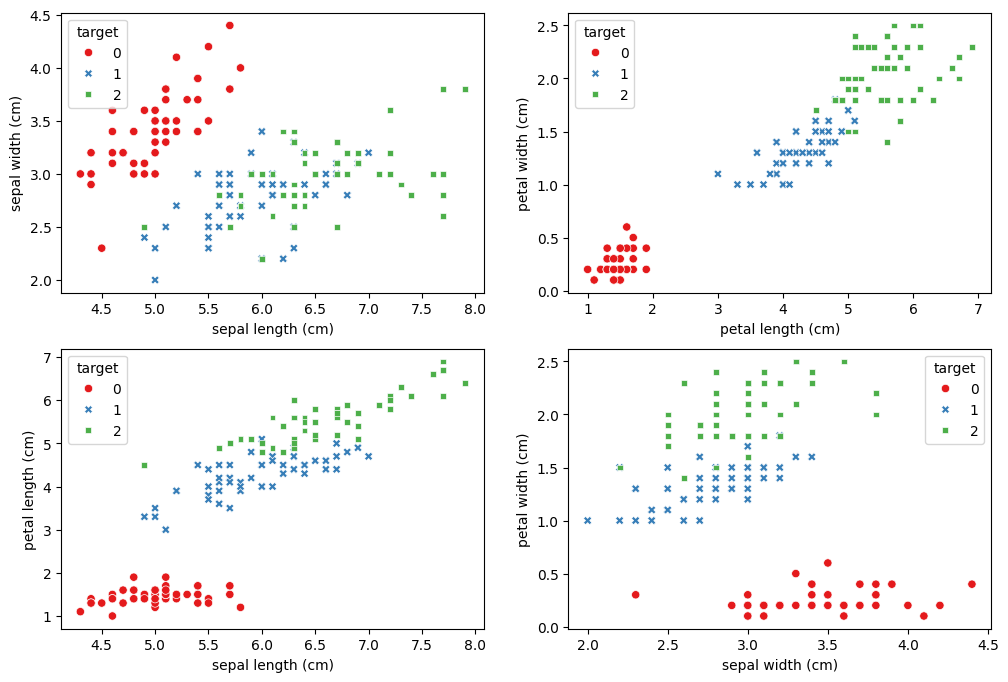

In [25]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(df, x='sepal length (cm)', y='sepal width (cm)', hue='target', style='target', palette='Set1')

plt.subplot(2, 2, 2)
sns.scatterplot(df, x='petal length (cm)', y='petal width (cm)', hue='target', style='target', palette='Set1')

plt.subplot(2, 2, 3)
sns.scatterplot(df, x='sepal length (cm)', y='petal length (cm)', hue='target', style='target', palette='Set1')

plt.subplot(2, 2, 4)
sns.scatterplot(df, x='sepal width (cm)', y='petal width (cm)', hue='target', style='target', palette='Set1')

plt.show

### Выбор признаков и целевого столбца

In [37]:
X = df.drop('target', axis=1)
y = df['target']

### Разбиение данных на тренировочные и тестовые выборки (80% - тренировка, 20% - тест)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Нормализация признаков с использованием StandardScaler

In [33]:
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

### Построение модели K-ближайших соседей

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_normalized, y_train)

KNeighborsClassifier()

 ### Прогнозирование результатов для тестовой выборки

In [40]:
y_predictions = knn_model.predict(X_test_normalized)

### Оценка качества модели

In [42]:
model_accuracy = accuracy_score(y_test, y_predictions)
classification_details = classification_report(y_test, y_predictions)

print(f"Точность классификации: {model_accuracy:.2f}")
print(classification_details)

Точность классификации: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Визуализация матрицы ошибок

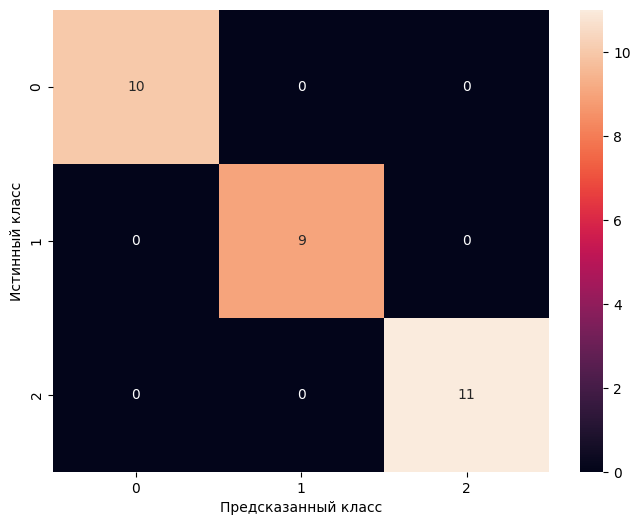

In [45]:
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Предсказанный класс')
plt.ylabel('Истинный класс')
plt.show()